# Names in Freiburg 

In [1]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

[Open Data Portal Freiburg](https://fritz.freiburg.de:8443/Informationsportal/configurator?scenario=OpenData) 

- Search for 'Vornamen' 
- I downloaded the filed and saved it to /data

## Reading data

In [2]:
# make a data frame from csv 
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 30: invalid continuation byte

Uups? What happend? 
As a standard 'utf-8' is used as encoding (Translation of special characters like 'ä,ö,ü'). In a lot of open data files other encodings are used. In this case you have to set encoding to 'iso-8859-1'  

In [3]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1')

In [4]:
df.head()

,"Jahr;""Geschlecht"";""Altersgruppe"";""Rang des Vornamen"";""Vorname"";""Hilfsmerkmal: Anzahl Name insgesamt"";""Anzahl Personen"""
0,"2016;""weiblich"";""50 bis unter 60 Jahre"";""2.Vorname"";""Maria "";""6099"";974"
1,"2016;""weiblich"";""75 Jahre und älter"";""2.Vorname"";""Maria "";""6099"";921"
2,"2016;""männlich"";""50 bis unter 60 Jahre"";""1.Vorname"";""Thomas "";""2062"";648"
3,"2016;""männlich"";""50 bis unter 60 Jahre"";""1.Vorname"";""Michael "";""3135"";628"
4,"2016;""weiblich"";""20 bis unter 30 Jahre"";""1.Vorname"";""Julia "";""1265"";518"


Still the DataFrame does not look nice. Even if it is a 'comma seperated value' (.csv) file, in this case it has a different seperator.  

In [5]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1', sep=';')

## Exploring data

In [6]:
# DataFrames often contain thousand of rows. To display them can be time consuming. To have a quick first look at
# the data, we can use head(). As a default it shows the first five rows. head(100) would show 100 rows.  
df.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
1,2016,weiblich,75 Jahre und älter,2.Vorname,Maria,6099,921
2,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Thomas,2062,648
3,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Michael,3135,628
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518


In [7]:
# Can you guess, what df.tail() does?
df.tail()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
68710,2016,weiblich,75 Jahre und älter,2.Vorname,Wilhemina,1,1
68711,2016,weiblich,75 Jahre und älter,2.Vorname,Winfriede,3,1
68712,2016,weiblich,75 Jahre und älter,2.Vorname,Xuan,5,1
68713,2016,weiblich,75 Jahre und älter,2.Vorname,Zäzilia,4,1
68714,2016,weiblich,75 Jahre und älter,2.Vorname,Zofia,16,1


In [8]:
# How many rows has the DataFrame?
len(df)

68715

In [9]:
# How many rows and columns has the DataFrame?
df.shape

(68715, 7)

In [10]:
# To show some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68715 entries, 0 to 68714
Data columns (total 7 columns):
Jahr                                   68715 non-null int64
Geschlecht                             68715 non-null object
Altersgruppe                           68715 non-null object
Rang des Vornamen                      68715 non-null object
Vorname                                68715 non-null object
Hilfsmerkmal: Anzahl Name insgesamt    68715 non-null int64
Anzahl Personen                        68715 non-null int64
dtypes: int64(3), object(4)
memory usage: 3.7+ MB


In [11]:
# To see how your numeral data is distributed you can use df.describe() 
df.describe()

,Jahr,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
count,68715.0,68715.000000,68715.000000
mean,2016.0,81.245550,4.562046
std,0.0,264.239495,18.277375
min,2016.0,1.000000,1.000000
25%,2016.0,1.000000,1.000000
50%,2016.0,7.000000,1.000000
75%,2016.0,39.000000,2.000000
max,2016.0,6099.000000,974.000000


### YOU DO IT 

There is a name in an age groupe that is shared by 974 People. 

What name is ist?
Just look again at the first rows of the names df. 

In [12]:
df.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
1,2016,weiblich,75 Jahre und älter,2.Vorname,Maria,6099,921
2,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Thomas,2062,648
3,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Michael,3135,628
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518


### Sorting

In [13]:
# If you want to change the order 
df.sort_values(by='Anzahl Personen').head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
34357,2016,männlich,20 bis unter 30 Jahre,2.Vorname,Józef,6,1
45801,2016,weiblich,0 bis unter 1 Jahr,2.Vorname,Emily,131,1
45802,2016,weiblich,0 bis unter 1 Jahr,2.Vorname,Enissa,3,1
45803,2016,weiblich,0 bis unter 1 Jahr,2.Vorname,Eris,1,1
45804,2016,weiblich,0 bis unter 1 Jahr,2.Vorname,Essra,1,1


In [14]:
# As a default sort_values(by='') gives a ascending order. To change that use 'ascending=False'.
df.sort_values(by='Hilfsmerkmal: Anzahl Name insgesamt', ascending=False).head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
24,2016,weiblich,75 Jahre und älter,1.Vorname,Maria,6099,377
2260,2016,männlich,20 bis unter 30 Jahre,2.Vorname,Maria,6099,24
5919,2016,männlich,40 bis unter 50 Jahre,2.Vorname,Maria,6099,8
5770,2016,männlich,10 bis unter 15 Jahre,2.Vorname,Maria,6099,8


### YOU DO IT 

In [15]:
# Sort the df by Name 
df.sort_values(by='Vorname')

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
39706,2016,männlich,40 bis unter 50 Jahre,2.Vorname,-iulian,1,1
53257,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,?ahika,1,1
34875,2016,männlich,30 bis unter 40 Jahre,1.Vorname,?erbanica-Dan,1,1
29284,2016,männlich,15 bis unter 20 Jahre,1.Vorname,?tefan,4,1
16671,2016,männlich,20 bis unter 30 Jahre,1.Vorname,?tefan,4,2
34876,2016,männlich,30 bis unter 40 Jahre,1.Vorname,?tefan,4,1
37876,2016,männlich,40 bis unter 50 Jahre,1.Vorname,?tefan-Catalin,1,1
31111,2016,männlich,20 bis unter 30 Jahre,1.Vorname,?tefan-Teodor,1,1
62504,2016,weiblich,40 bis unter 50 Jahre,2.Vorname,?tefania,2,1
59929,2016,weiblich,30 bis unter 40 Jahre,2.Vorname,?tefania,2,1


## Filtering 

In [16]:
# If you want to reduce complexity, you can filter for special values
# To filter just for female names: 

weiblich = df[df['Geschlecht'] == 'weiblich']

In [17]:
len(weiblich)

35439

In [18]:
weiblich_erster = weiblich[weiblich['Rang des Vornamen'] == '1.Vorname']

In [19]:
len(weiblich_erster)

24730

In [20]:
## Of course you can filter numeral values, too 
weiblich_erster[weiblich_erster['Anzahl Personen'] > 400]

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518
8,2016,weiblich,50 bis unter 60 Jahre,1.Vorname,Sabine,1204,452
9,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Anna,2430,445
13,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Lisa,786,410


In [21]:
# If you want to see how many age groups, you can count for values  
weiblich_erster.Altersgruppe.value_counts()

20 bis unter 30 Jahre    4763
30 bis unter 40 Jahre    3583
40 bis unter 50 Jahre    2753
50 bis unter 60 Jahre    2047
5 bis unter 10 Jahre     1779
15 bis unter 20 Jahre    1775
10 bis unter 15 Jahre    1697
1 bis unter 5 Jahre      1599
75 Jahre und älter       1248
60 bis unter 65 Jahre    1129
65 bis unter 70 Jahre    1002
70 bis unter 75 Jahre     828
0 bis unter 1 Jahr        527
Name: Altersgruppe, dtype: int64

In [22]:
weiblich_babys_erster = weiblich_erster[weiblich_erster['Altersgruppe'] == '0 bis unter 1 Jahr'] 

In [23]:
weiblich_babys_erster.head(10)

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
2837,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Sophia,614,19
3505,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Marie,1268,15
3997,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Emilia,257,13
3998,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Emma,364,13
4298,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Ella,165,12
4299,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Lea,433,12
4300,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Lina,302,12
4301,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Mia,201,12
4302,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Mila,86,12
4636,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Anna,2430,11


In [24]:
### Plotting

In [25]:
# If you want to plot the data, often it is a good idea, to use only the columns that are necessary for your plot
# Yo can do so by giving pandas a list of column names 
weiblich_babys_erster = weiblich_babys_erster[['Anzahl Personen', 'Vorname']]

In [26]:
weiblich_babys_erster.head()

,Anzahl Personen,Vorname
2837,19,Sophia
3505,15,Marie
3997,13,Emilia
3998,13,Emma
4298,12,Ella


In [27]:
# To plot the names on the axis, you set the column as the index of the df
weiblich_babys_erster = weiblich_babys_erster.set_index('Vorname')

In [28]:
weiblich_babys_erster.head()

,Anzahl Personen
Vorname,
Sophia,19
Marie,15
Emilia,13
Emma,13
Ella,12


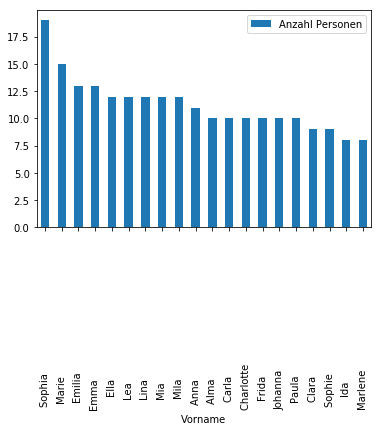

In [29]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [30]:
# What's this? Look at all the whitespace after the names
weiblich_babys_erster.index

Index(['Sophia                                            ',
       'Marie                                             ',
       'Emilia                                            ',
       'Emma                                              ',
       'Ella                                              ',
       'Lea                                               ',
       'Lina                                              ',
       'Mia                                               ',
       'Mila                                              ',
       'Anna                                              ',
       ...
       'Wilma                                             ',
       'Yasmin                                            ',
       'Yassira                                           ',
       'Ylva                                              ',
       'Ylvi                                              ',
       'Zahra                                             ',
       'Zivan

In [31]:
# remove whitespace to clean the data  
weiblich_babys_erster.index = weiblich_babys_erster.index.str.strip()

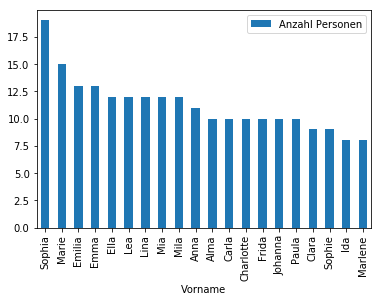

In [32]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [33]:
# clean the whole column
df.Vorname = df.Vorname.str.strip()

## YOU DO IT 

In [34]:
# What where the most popular baby names for boys 0-1 in 2016?

df[(df['Geschlecht'] == 'männlich') & (df['Altersgruppe'] == '0 bis unter 1 Jahr')].head()


,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
3208,2016,männlich,0 bis unter 1 Jahr,1.Vorname,Noah,259,16
3402,2016,männlich,0 bis unter 1 Jahr,1.Vorname,Elias,336,15
3629,2016,männlich,0 bis unter 1 Jahr,1.Vorname,Maximilian,840,14
3630,2016,männlich,0 bis unter 1 Jahr,1.Vorname,Moritz,546,14
3631,2016,männlich,0 bis unter 1 Jahr,1.Vorname,Samuel,338,14


In [35]:
# What is the least popular female name in the age group '65 bis unter 70 Jahre'

df[(df['Geschlecht'] == 'weiblich') & (df['Altersgruppe'] == '65 bis unter 70 Jahre')].head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
32,2016,weiblich,65 bis unter 70 Jahre,2.Vorname,Maria,6099,343
115,2016,weiblich,65 bis unter 70 Jahre,2.Vorname,Elisabeth,2692,214
141,2016,weiblich,65 bis unter 70 Jahre,1.Vorname,Monika,1225,188
162,2016,weiblich,65 bis unter 70 Jahre,1.Vorname,Ursula,1631,175
230,2016,weiblich,65 bis unter 70 Jahre,1.Vorname,Brigitte,1097,146


## More data cleaning, more plotting 

In [36]:
# Let's look at my name 
patricia = df[df['Vorname'] == 'Patricia']

In [37]:
patricia.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
776,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Patricia,286,61
1086,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Patricia,286,47
1329,2016,weiblich,50 bis unter 60 Jahre,1.Vorname,Patricia,286,40
1488,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Patricia,286,36
2874,2016,weiblich,30 bis unter 40 Jahre,2.Vorname,Patricia,286,19


In [38]:
patricia_erster = patricia[patricia['Rang des Vornamen'] == '1.Vorname']
patricia_erster

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
776,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Patricia,286,61
1086,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Patricia,286,47
1329,2016,weiblich,50 bis unter 60 Jahre,1.Vorname,Patricia,286,40
1488,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Patricia,286,36
4026,2016,weiblich,15 bis unter 20 Jahre,1.Vorname,Patricia,286,13
11382,2016,weiblich,60 bis unter 65 Jahre,1.Vorname,Patricia,286,4
15064,2016,weiblich,65 bis unter 70 Jahre,1.Vorname,Patricia,286,3
19785,2016,weiblich,5 bis unter 10 Jahre,1.Vorname,Patricia,286,2
20089,2016,weiblich,10 bis unter 15 Jahre,1.Vorname,Patricia,286,2
46829,2016,weiblich,1 bis unter 5 Jahre,1.Vorname,Patricia,286,1


In [39]:
# I want to find out in which age group patricia is most coommon and make a plot 
patricia_erster.Altersgruppe.sort_values()

46829      1 bis unter 5 Jahre
20089    10 bis unter 15 Jahre
4026     15 bis unter 20 Jahre
776      20 bis unter 30 Jahre
1488     30 bis unter 40 Jahre
1086     40 bis unter 50 Jahre
19785     5 bis unter 10 Jahre
1329     50 bis unter 60 Jahre
11382    60 bis unter 65 Jahre
15064    65 bis unter 70 Jahre
Name: Altersgruppe, dtype: object

In [40]:
patricia_erster = patricia_erster[['Anzahl Personen', 'Altersgruppe']]

In [41]:
patricia_erster = patricia_erster.set_index('Altersgruppe')

In [42]:
patricia_erster

,Anzahl Personen
Altersgruppe,
20 bis unter 30 Jahre,61
40 bis unter 50 Jahre,47
50 bis unter 60 Jahre,40
30 bis unter 40 Jahre,36
15 bis unter 20 Jahre,13
60 bis unter 65 Jahre,4
65 bis unter 70 Jahre,3
5 bis unter 10 Jahre,2
10 bis unter 15 Jahre,2


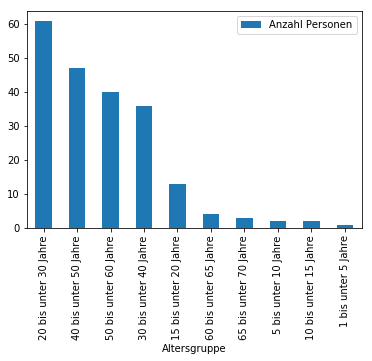

In [43]:
patricia_erster.plot(kind='bar')

In [44]:
# We have a plot now, but it is hard to read. Letz try to sort the index
patricia_erster.sort_index()

,Anzahl Personen
Altersgruppe,
1 bis unter 5 Jahre,1
10 bis unter 15 Jahre,2
15 bis unter 20 Jahre,13
20 bis unter 30 Jahre,61
30 bis unter 40 Jahre,36
40 bis unter 50 Jahre,47
5 bis unter 10 Jahre,2
50 bis unter 60 Jahre,40
60 bis unter 65 Jahre,4


Because of missing leading zeros the automatical sorting is not working as expected


To clean this up, there is something very cool called 'regex'. With regex you can serach for patterns and replace them. 
I'll just show you the special characters we need in this case. 

> If you want to try regex here is a simulator and a cheatsheet: [pythex](https://pythex.org/) 

Special characters

|Character  | Means                                                     |
| --------- |:-------------:                                            |
|\          | escape special characters                                 |
|\d         | matches a single digit                                    |
|\b         | matches empty string at word boundary                     |


In [45]:
pattern = r"(\b[1]\b)"

In [48]:
# Now you use your regex pattern, to replace the numbers 0,1,5
df.Altersgruppe = df.Altersgruppe.str.replace(pattern,'01')

In [49]:
df.Altersgruppe.value_counts()

20 bis unter 30 Jahre    11732
30 bis unter 40 Jahre     9303
40 bis unter 50 Jahre     7544
50 bis unter 60 Jahre     5989
15 bis unter 20 Jahre     5353
5 bis unter 10 Jahre      5294
01 bis unter 5 Jahre      5144
10 bis unter 15 Jahre     5093
75 Jahre und älter        3186
60 bis unter 65 Jahre     3107
65 bis unter 70 Jahre     2772
70 bis unter 75 Jahre     2352
0 bis unter 01 Jahr       1846
Name: Altersgruppe, dtype: int64

In [50]:
pat2 = r"(\b[0]\b)"
pat3 = r"(\b[5]\b)"

In [51]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat2,'00')

In [52]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat3,'05')

In [53]:
df.Altersgruppe.value_counts()

20 bis unter 30 Jahre    11732
30 bis unter 40 Jahre     9303
40 bis unter 50 Jahre     7544
50 bis unter 60 Jahre     5989
15 bis unter 20 Jahre     5353
05 bis unter 10 Jahre     5294
01 bis unter 05 Jahre     5144
10 bis unter 15 Jahre     5093
75 Jahre und älter        3186
60 bis unter 65 Jahre     3107
65 bis unter 70 Jahre     2772
70 bis unter 75 Jahre     2352
00 bis unter 01 Jahr      1846
Name: Altersgruppe, dtype: int64

In [54]:
## 
patricia2 =  df[(df['Vorname'] == 'Patricia') & (df['Rang des Vornamen'] == '1.Vorname') ]

In [55]:
patricia2 = patricia2[['Anzahl Personen', 'Altersgruppe']]

In [56]:
patricia2 = patricia2.set_index('Altersgruppe')

In [57]:
patricia2 = patricia2.sort_index(ascending=False)

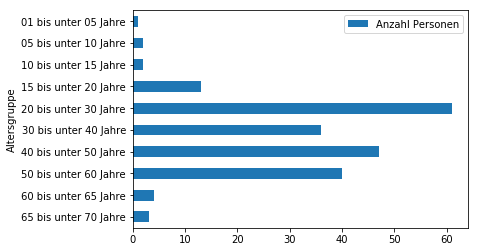

In [58]:
patricia2.plot(kind='barh')

## YOU DO IT 

In [59]:
# Search for your name and look at how common is the name in the age groups 

In [60]:
df.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
1,2016,weiblich,75 Jahre und älter,2.Vorname,Maria,6099,921
2,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Thomas,2062,648
3,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Michael,3135,628
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518


In [61]:
marie = df[(df['Vorname'] == 'Marie-Louise') & (df['Rang des Vornamen'] == '1.Vorname')]

In [62]:
marie

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
9048,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Marie-Louise,24,5
20389,2016,weiblich,15 bis unter 20 Jahre,1.Vorname,Marie-Louise,24,2
21519,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Marie-Louise,24,2
23346,2016,weiblich,75 Jahre und älter,1.Vorname,Marie-Louise,24,2
45588,2016,weiblich,00 bis unter 01 Jahr,1.Vorname,Marie-Louise,24,1
48499,2016,weiblich,05 bis unter 10 Jahre,1.Vorname,Marie-Louise,24,1
50353,2016,weiblich,10 bis unter 15 Jahre,1.Vorname,Marie-Louise,24,1
61721,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Marie-Louise,24,1
67221,2016,weiblich,70 bis unter 75 Jahre,1.Vorname,Marie-Louise,24,1


In [63]:
marie = marie[['Anzahl Personen', 'Altersgruppe']]

In [64]:
marie = marie.set_index('Altersgruppe')

In [65]:
marie = marie.sort_index(ascending=True)

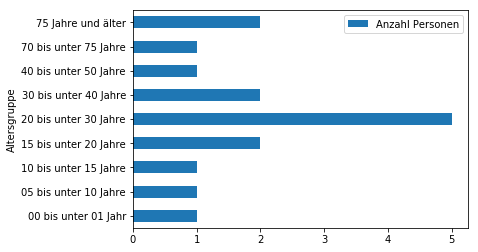

In [66]:
marie.plot(kind='barh')